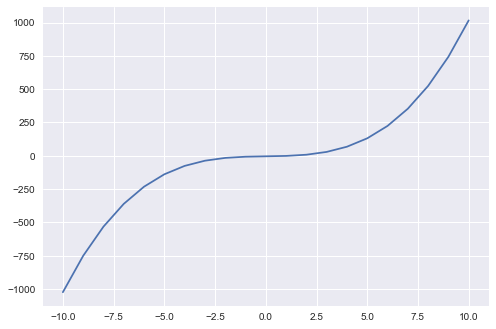

In [58]:
# https://stackoverflow.com/questions/14000595/graphing-an-equation-with-matplotlib
# https://stackoverflow.com/questions/31069191/simple-line-plots-using-seaborn
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

import itertools as it

# make the graph prettier (seaborn uses matplotlib but with better defaults)
sns.set_style("darkgrid")

def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)
    plt.plot(x, y)  

def my_formula(x):
    return x**3+2*x-4

graph(my_formula, range(-10, 11))
plt.show()

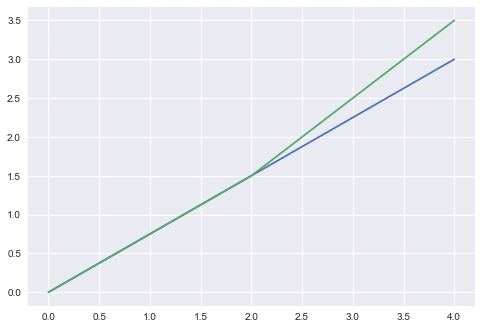

In [47]:
def graph2(functions, x_range):
    # functions is a list of functions 
    x = np.array(x_range)
    y = np.array([f(x) for (f, x) in zip(functions, x)])
    plt.plot(x, y)

# Cost Function
def cost_function_unadapted(x):
    return .75*x

def cost_function_adapted(x):
    # hardcoded offset to make graphs line up
    return x - .5

def baseline():
    return it.repeat(cost_function_unadapted, 3)

def adapt(baseline_function):
    return lambda f: it.chain(baseline_function(), it.repeat(f))

adapter = adapt(baseline)
unadapted = adapter(cost_function_unadapted)
adapted = adapter(cost_function_adapted)
    
graph2(unadapted, range(0, 5))
graph2(adapted, range(0, 5))
plt.show()

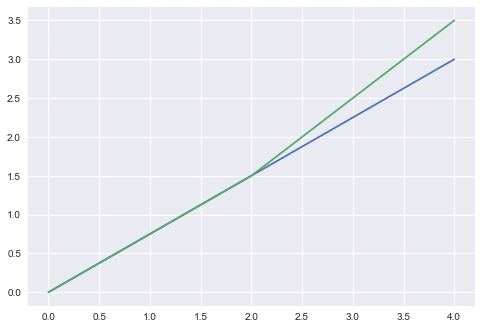

In [68]:
def graph3(function, step_num):
    # function is a recurrence function, not an actual math function
    x = np.arange(step_num)
    y = np.array(list(it.accumulate(range(step_num), function)))
    plt.plot(x, y)
    
def cost_unadapted(x, _):
    return x + .75
    
def cost_adapted(x, _):
    return x + 1

def baseline2():
    return it.repeat(cost_unadapted, 2)

def adapt2(baseline_function, f):
    funcs = it.chain(baseline_function(), it.repeat(f))
    def combined(*args, **kwargs):
        return next(funcs)(*args, **kwargs)
        
    return combined

unadapted2 = adapt2(baseline2, cost_unadapted)
adapted2 = adapt2(baseline2, cost_adapted)
graph3(unadapted2, 5)
graph3(adapted2, 5)
plt.show()